<a href="https://colab.research.google.com/github/monicasenna/movasc_scripts/blob/main/indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Mostrar gráficos diretamente no notebook
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Lê o arquivo (ajuste o nome conforme necessário)
df = pd.read_csv('/content/drive/MyDrive/Movasc2/teleconexoes.csv')
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
print(df)

          data     AAO   PDO  SOI    QBO   MEI     AO   TSA   TNA   SAODI  \
0   1993-01-01 -2.0206 -0.28 -0.9   9.63  0.83  3.495 -0.25 -0.25 -0.1584   
1   1993-02-01  0.4370  0.02 -0.7  10.81  0.93  0.184 -0.13 -0.25 -0.6282   
2   1993-03-01 -0.3776  0.24 -0.5  11.36  0.78  0.764 -0.09 -0.23 -0.5608   
3   1993-04-01  0.0872  1.00 -1.2  12.60  0.98 -0.435  0.20 -0.07 -0.4455   
4   1993-05-01  1.2599  1.79 -0.3  13.56  1.48 -1.607  0.03 -0.04 -0.4526   
..         ...     ...   ...  ...    ...   ...    ...   ...   ...     ...   
367 2023-08-01 -0.0382 -2.47  0.8  -9.88  0.51 -0.602  0.50  1.36 -0.0615   
368 2023-09-01 -1.0504 -2.99 -1.3 -13.58  0.68  0.318  0.40  1.43 -0.1598   
369 2023-10-01  0.5352 -2.23 -0.5 -16.98  0.48 -0.414  0.41  1.32 -0.1575   
370 2023-11-01  0.0965 -1.79 -0.8 -19.80  0.91 -0.036  0.91  1.09  0.6147   
371 2023-12-01  1.5100 -1.66 -0.2 -22.69  1.13 -0.222  1.31  1.17  1.2544   

     ...   PNA   AMO   ONI    WP   NAO  NIN12  NIN03  NIN034  NIN04     IAS

In [5]:
# Se a primeira coluna for uma coluna de data
if pd.to_datetime(df.iloc[:, 0], errors='coerce').notnull().all():
    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
    df.set_index(df.columns[0], inplace=True)

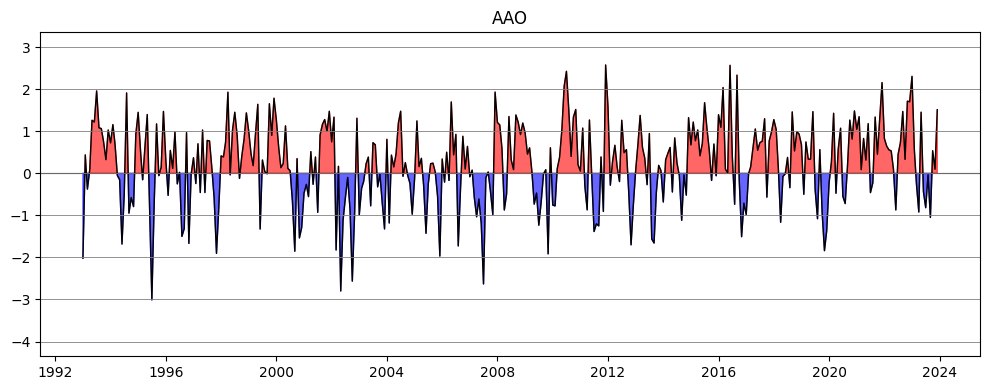

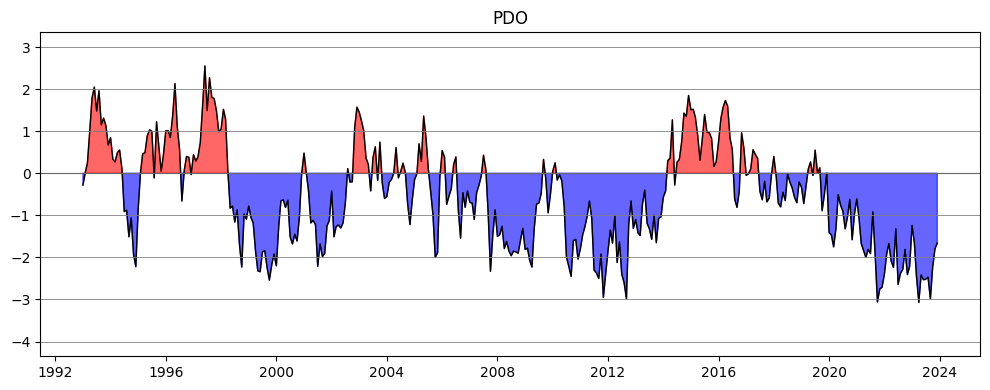

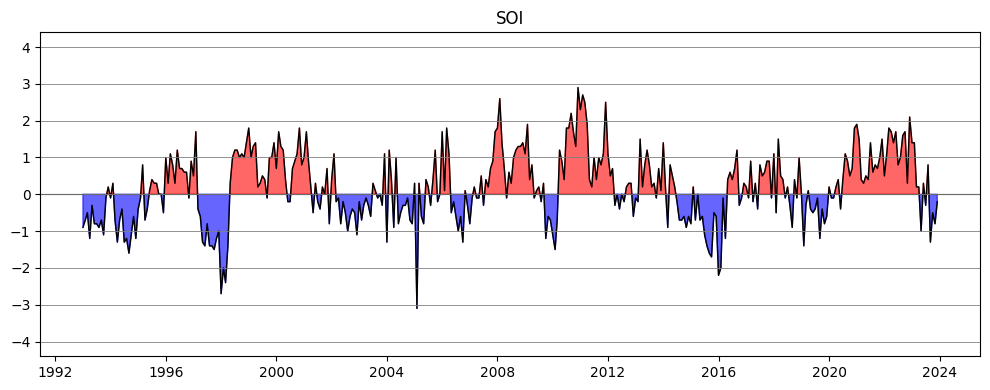

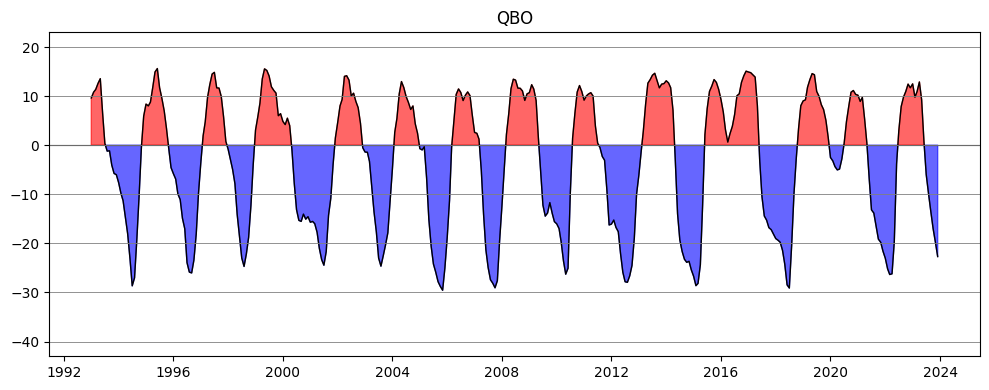

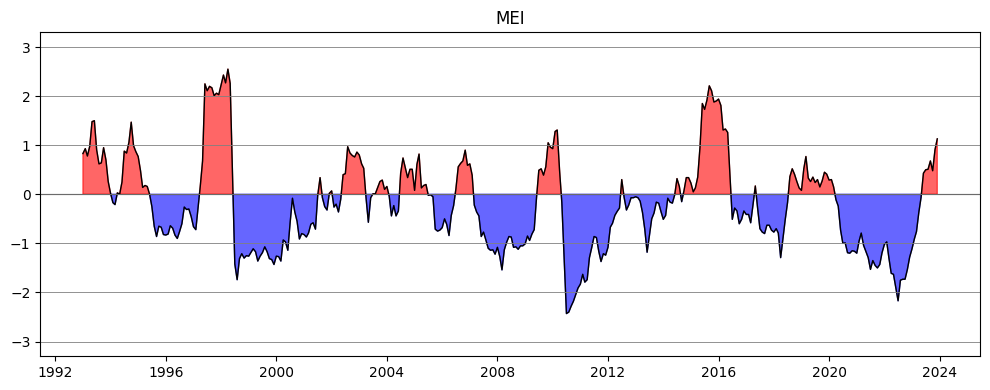

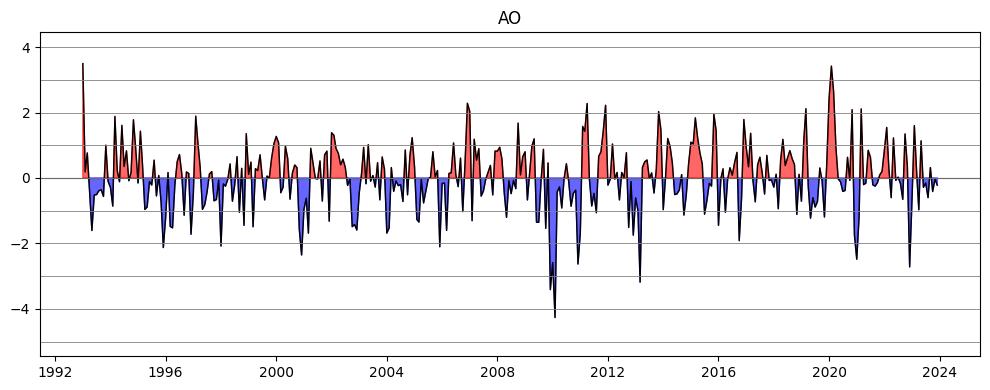

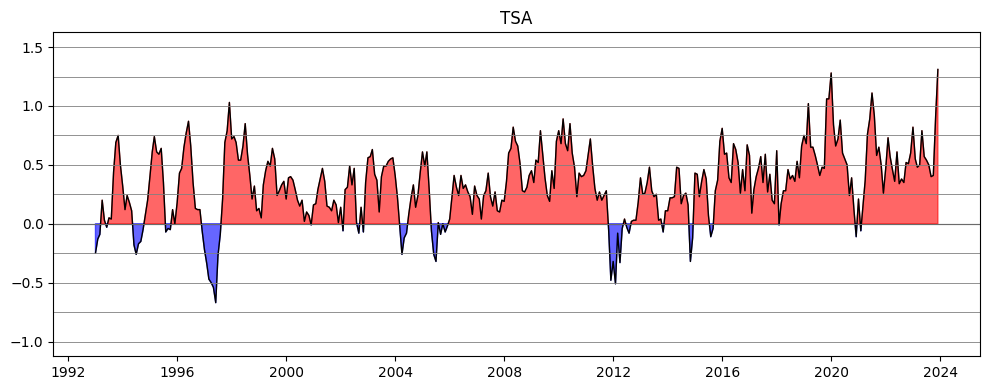

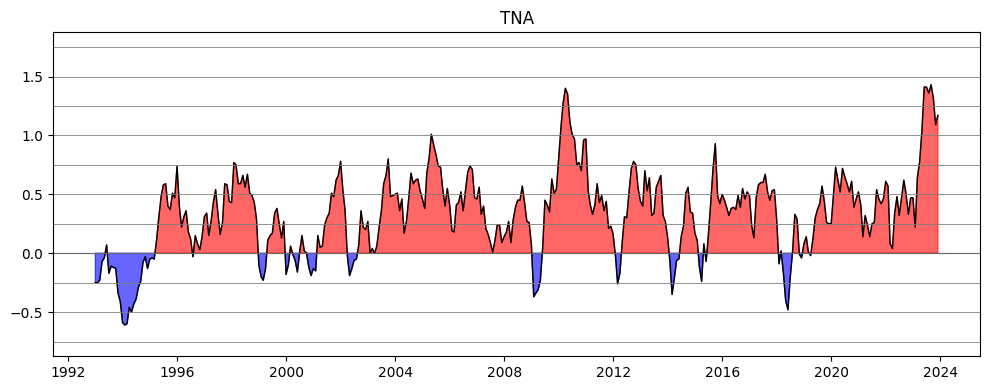

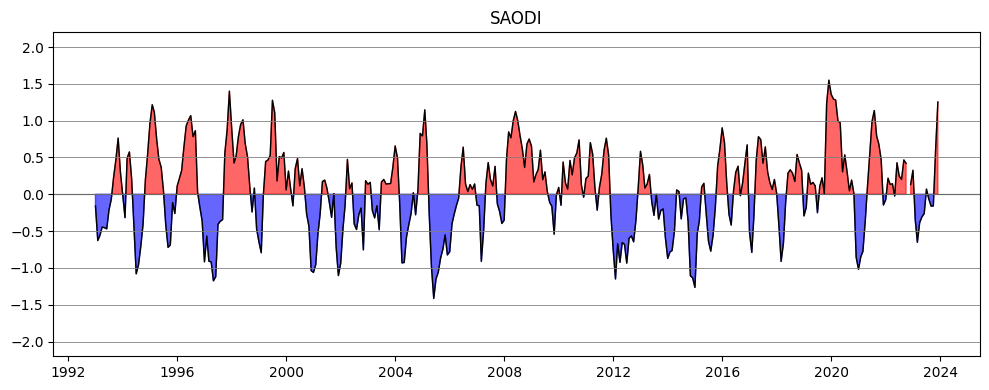

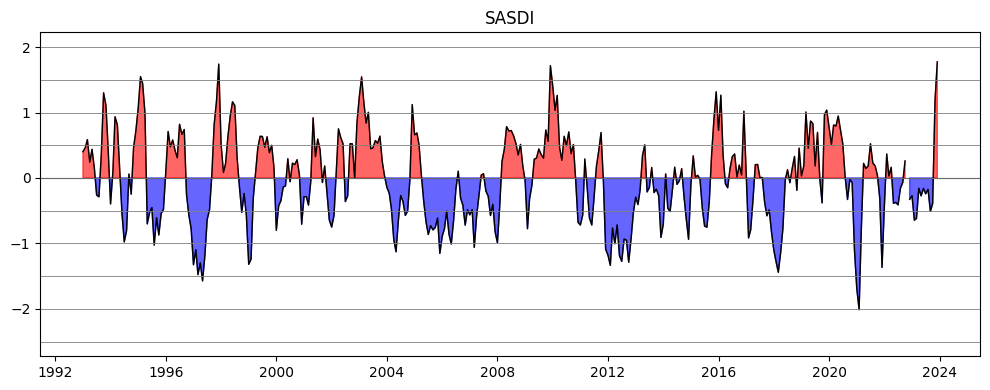

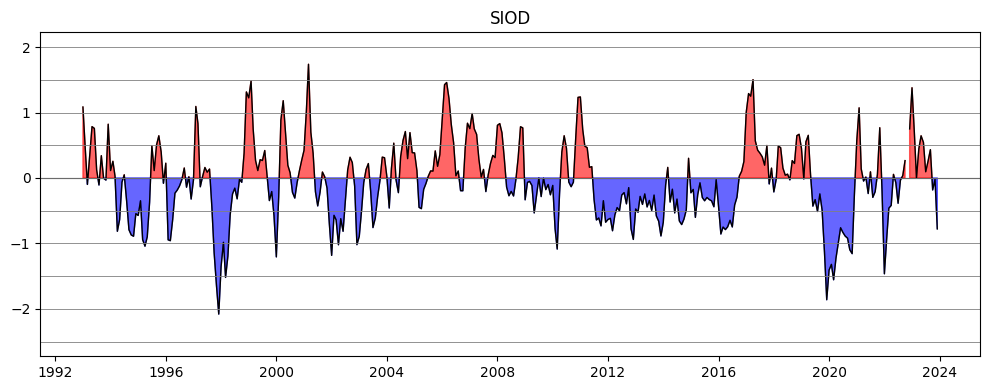

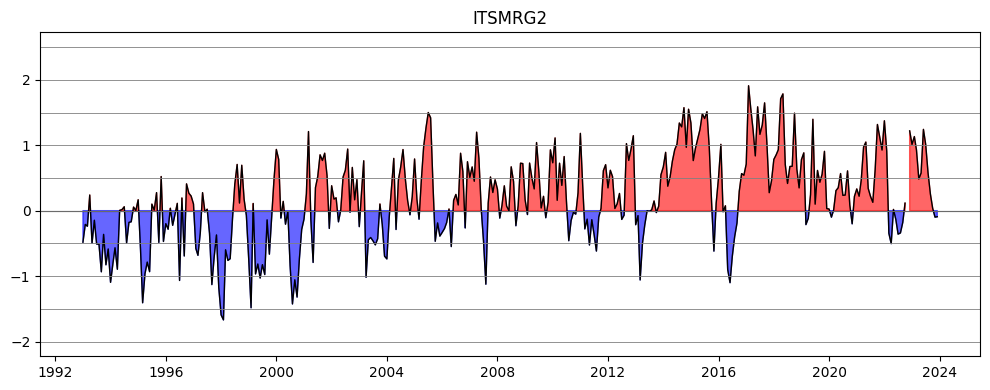

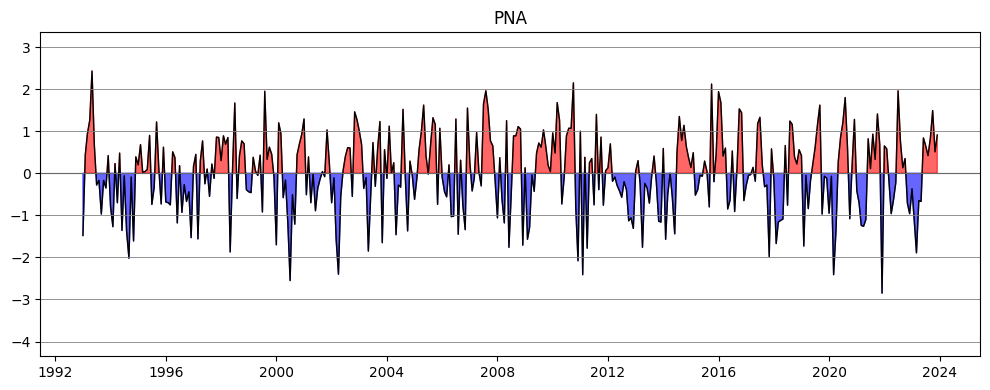

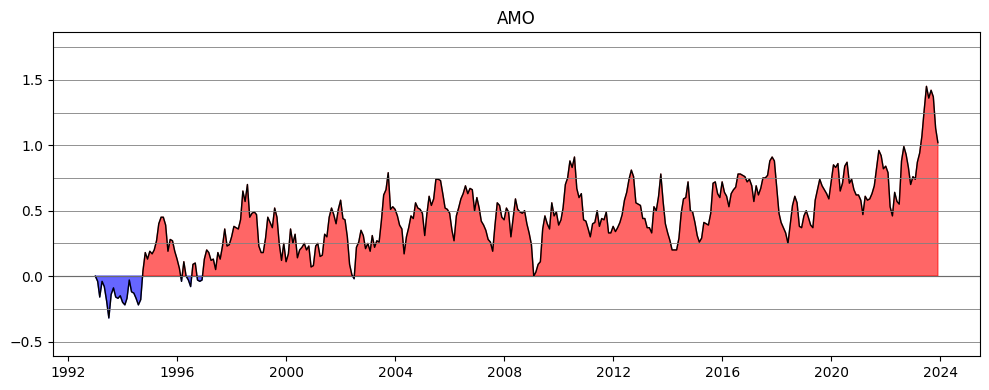

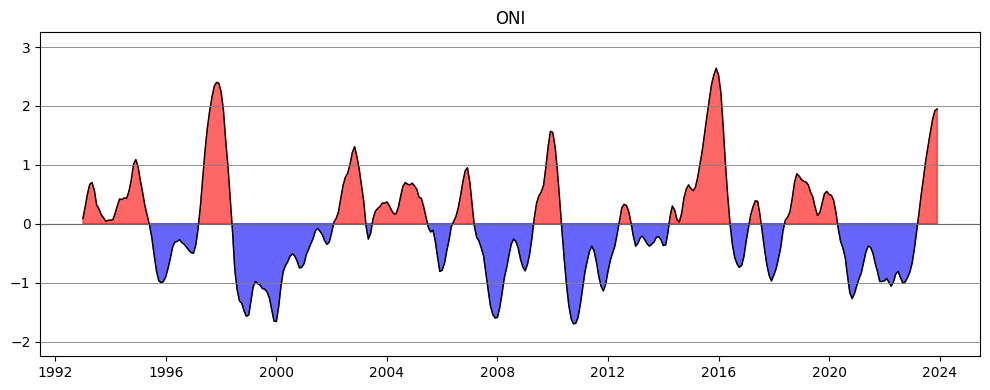

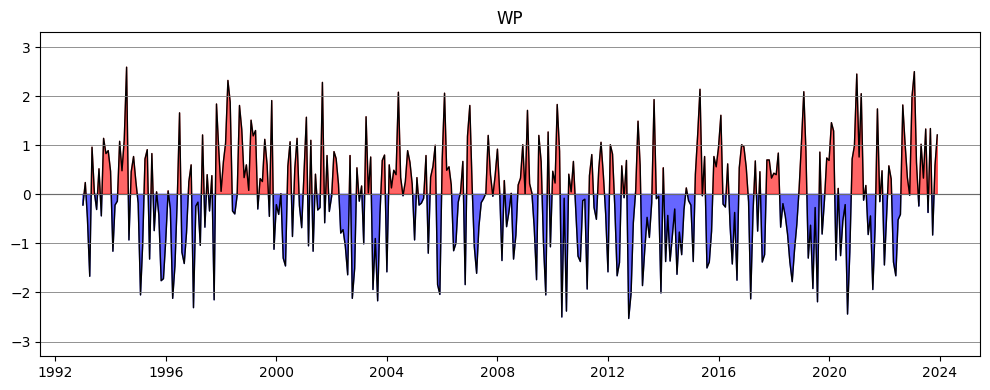

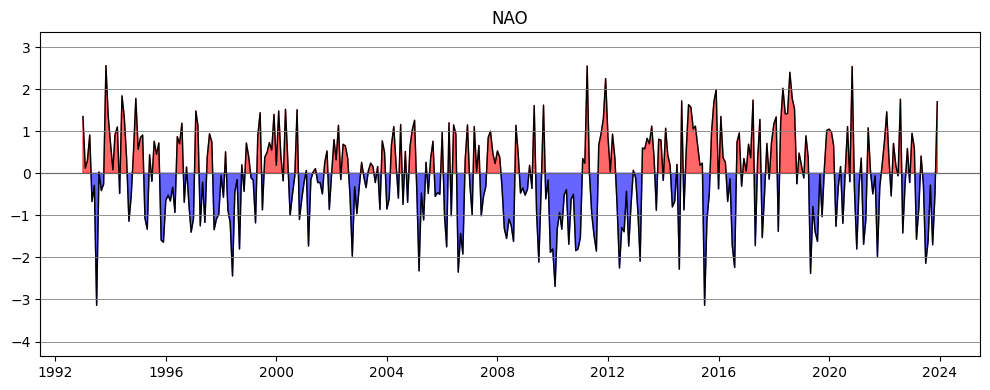

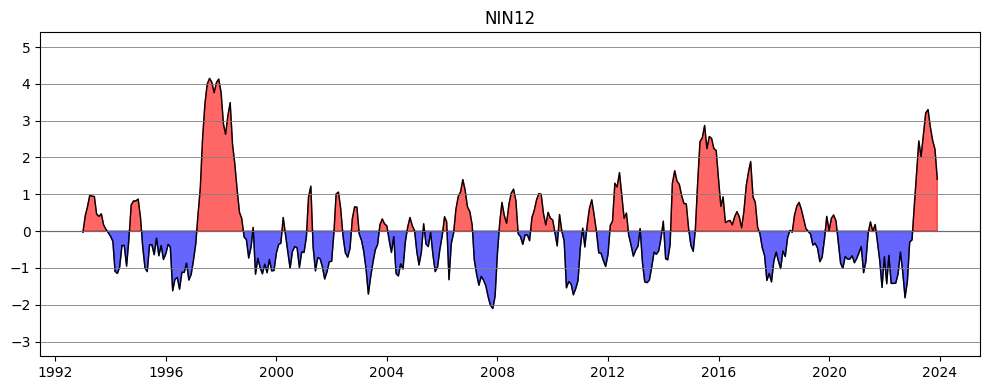

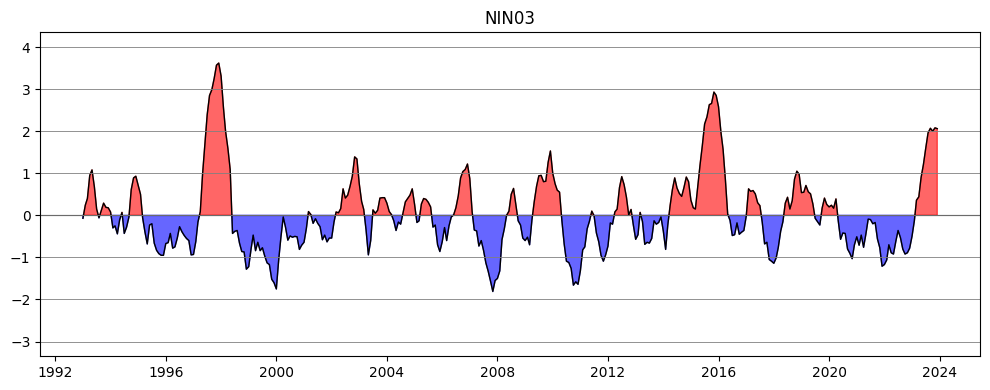

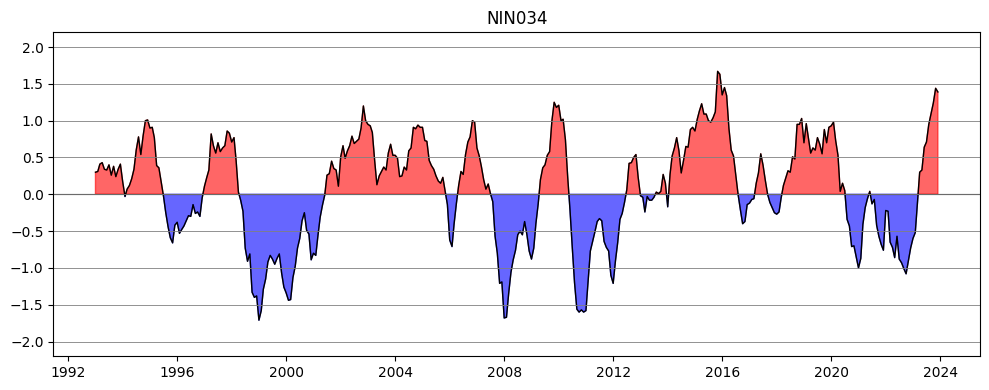

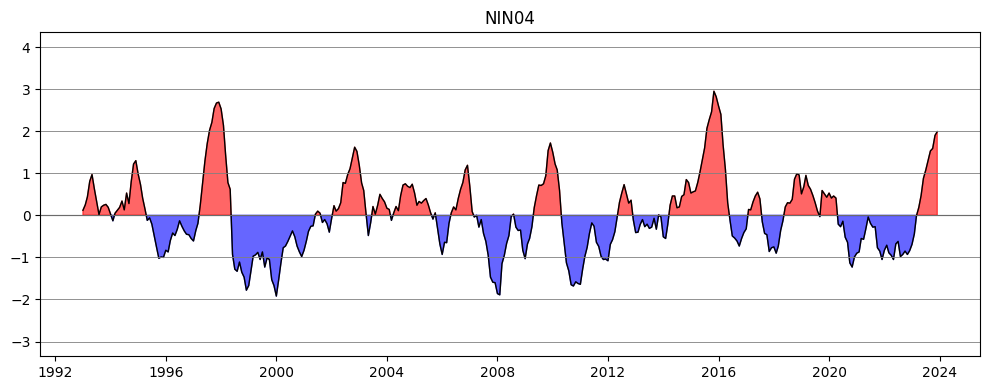

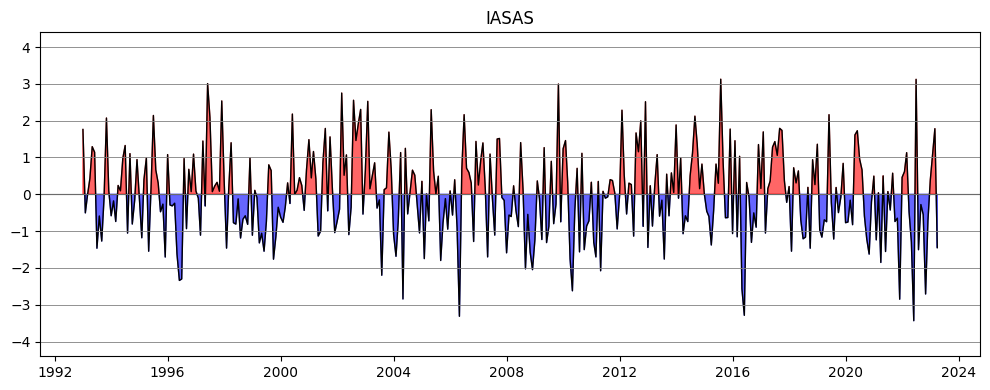

In [19]:
# Número de séries temporais
num_series = df.shape[1]

# Loop para criar um gráfico por série
for i, column in enumerate(df.columns):
    plt.figure(figsize=(10, 4))
    x = df.index
    y = df[column]

    plt.plot(x, y, color='black', linewidth=1)
    plt.title(f"{column}")
    #plt.axhline(color='gray', linestyle='--', linewidth=0.8)
    plt.axhline(0, color='black', linewidth=0.8)  # eixo X

            # === Linhas horizontais manuais no eixo Y ===
    y_min, y_max = plt.ylim()
    yticks = plt.yticks()[0]  # valores atuais dos ticks do eixo Y
    for ytick in yticks:
        plt.axhline(ytick, color='gray', linewidth=0.6, linestyle='-')

            # Preenchimento condicional
    plt.fill_between(x, y, 0, where=(y >= 0), interpolate=True, color='red', alpha=0.6, label='Positivo')
    plt.fill_between(x, y, 0, where=(y < 0), interpolate=True, color='blue', alpha=0.6, label='Negativo')

    #plt.legend()
    #plt.grid(True)
    plt.tight_layout()
    plt.show()
